# First steps with SYGMA

A simple stellar population is a population of stars born out of the same gas cloud.
This notebook explains how the basic chemical evolution parameter lead to the ejecta of stellar matter.
We will use (artificial) yields out of pure h1 yields. 
You can find the documentation <a href="http://nugrid.github.io/NuPyCEE/SPHINX/build/html/sygma.html">here</a>.

In [129]:
#%pylab nbagg
import sygma as s
reload(s)
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import os
import sys

## 1. The initial mass function

### a) Basics

The IMF allows to calculate the number of stars $N_{12}$ in the mass interval [m1,m2] with

(I) $N_{12}$ = k_N $\int _{m1}^{m2} m^{-2.35} dm$ 

Where k_N is the normalization constant. It can be derived from the total amount of mass of the system $M_{tot}$
since the total mass $M_{12}$ in the mass interval above can be estimated with

(II) $M_{12}$ = k_N $\int _{m1}^{m2} m^{-1.35} dm$

With a total mass interval of [1,30] and $M_{tot}=1e11$ the $k_N$ can be derived:

$1e11 = k_N/0.35 * (1^{-0.35} - 30^{-0.35})$

In [42]:
k_N=1e11*0.35/ (1**-0.35 - 30**-0.35) #(I)

The total number of stars $N_{tot}$ is then:

In [33]:
N_tot=k_N/1.35 * (1**-1.35 - 30**-1.35) #(II)
print N_tot

36877281297.2


With a yield ejected of $0.1 Msun$, the total amount ejected is:

In [34]:
Yield_tot=0.1*N_tot
print Yield_tot/1e11

0.0368772812972


compared to the simulation:

In [35]:
import sygma as s
reload(s)
s1=s.sygma(iolevel=0,mgal=1e11,dt=1e7,imf_type='salpeter',imf_bdys=[1,30],iniZ=0.02,hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=True, sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn',pop3_table='yield_tables/popIII_h1.txt')
Yield_tot_sim=s1.history.ism_iso_yield[-1][0]
#% matplotlib inline

SYGMA run in progress..
   SYGMA run completed - Run time: 0.32s


Compare both results:

In [36]:
print Yield_tot_sim
print Yield_tot
print 'ratio should be 1 : ',Yield_tot_sim/Yield_tot

3697728129.72
3687728129.72
ratio should be 1 :  1.00271169665


In [37]:
import read_yields as ry
path = os.environ['SYGMADIR']+'/yield_tables/isotope_yield_table.txt'
ytables = ry.read_nugrid_yields(path,excludemass=[32,60])
zm_lifetime_grid=s1.zm_lifetime_grid_current

### b) Selection of different initial mass intervals

##### Select imf_bdys=[5,20]

In [12]:
k_N=1e11*0.35/ (5**-0.35 - 20**-0.35)
N_tot=k_N/1.35 * (5**-1.35 - 20**-1.35)
Yield_tot=0.1*N_tot

In [25]:
s1_5_20=s.sygma(iolevel=0,mgal=1e11,dt=1e9,tend=1.3e10,imf_type='salpeter',\
           imf_bdys=[5,20],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=False, \
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
Yield_tot_sim=s1_5_20.history.ism_iso_yield[-1][0]

SYGMA run in progress..
   SYGMA run completed - Run time: 0.26s


In [26]:
print 'Sould be 1:' ,Yield_tot_sim/Yield_tot

Sould be 1: 1.0


Now you could try to calculate your own total mass ejected for a mass range beween 1Msun and 5Msun.

### c) Distinguishing between massive and AGB sources:

Boundaries between AGB and massive for Z=0 (1e-4) at 8 (transitionmass parameter)

In [27]:
Yield_agb= ( k_N/1.35 * (1**-1.35 - 8.**-1.35) ) * 0.1
Yield_massive= ( k_N/1.35 * (8.**-1.35 - 30**-1.35) ) * 0.1

In [28]:
print 'Should be 1:',Yield_agb/s1.history.ism_iso_yield_agb[-1][0]
print 'Should be 1:',Yield_massive/s1.history.ism_iso_yield_massive[-1][0]
print 'Test total number of SNII agree with massive star yields: ',sum(s1.history.sn2_numbers)*0.1/Yield_massive
print  sum(s1.history.sn2_numbers)

Should be 1: 3.17962154178
Should be 1: 3.17962154178
Test total number of SNII agree with massive star yields:  0.314502838422
1871484249.69


### d) Time evolution

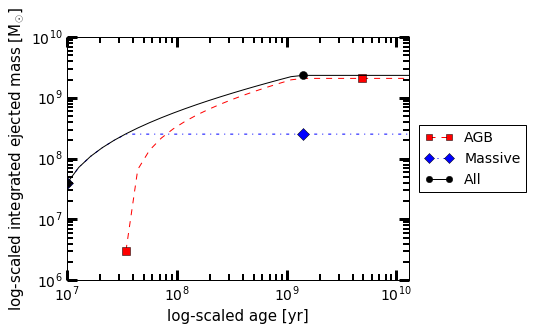

In [90]:
s1.plot_totmasses(source='agb')
s1.plot_totmasses(source='massive')
s1.plot_totmasses(source='all')

For plotting, take the lifetimes/masses from the yield grid:

$
Initial Mass [Msun] & Age [yr]
1 & 5.67e9
1.65 & 1.211e9
2 & 6.972e8
3 & 2.471e8
4 & 1.347e8
5 & 8.123e7
6 & 5.642e7
7 & 4.217e7
12 & 1.892e7
15 & 1.381e7
20 & 9.895e6
25 & 7.902e6
$

In [47]:
s1_evol=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,imf_type='salpeter',alphaimf=2.35,\
           imf_bdys=[1,30],iniZ=0,hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=False, \
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')

SYGMA run in progress..
   SYGMA run completed - Run time: 0.31s


In [48]:
k_N=1e11*0.35/ (1**-0.35 - 30**-0.35) #(I)

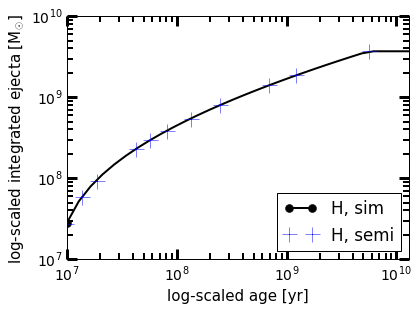

In [49]:
s1_evol.plot_mass(specie='H',label='H, sim',color='k',shape='-',marker='o',markevery=800)
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6]
def yields(m,k_N):
    return ( k_N/1.35 * (m**-1.35 - 30.**-1.35) ) * 0.1
yields1=[]
for m1 in m:
    yields1.append(yields(m1,k_N))
plt.plot(ages,yields1,marker='+',linestyle='',markersize=15,label='H, semi')
plt.legend(loc=4)

Visible is the agreement of the semi-analytical calculations with the result from SYGMA.

### d) Other IMF types: Chabrier IMF

#### Chabrier:

M<1: $IMF(m) = \frac{0.158}{m} * \exp{ \frac{-(log(m) - log(0.08))^2}{2*0.69^2}}$

else: $IMF(m) = m^{-2.3}$

In [50]:
def imf_times_m(mass):
    if mass<=1:
        return 0.158 * np.exp( -np.log10(mass/0.079)**2 / (2.*0.69**2))
    else:
        return mass*0.0443*mass**(-2.3)
k_N= 1e11/ (quad(imf_times_m,0.01,30)[0] )

In [51]:
N_tot=k_N/1.3 * 0.0443* (1**-1.3 - 30**-1.3)
Yield_tot=N_tot * 0.1

In [54]:
s1_chabrier=s.sygma(iolevel=0,mgal=1e11,dt=1e9,tend=1.3e10,imf_type='chabrier',imf_bdys=[0.01,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=False, sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
Yield_tot_sim=s1_chabrier.history.ism_iso_yield[-1][0]


SYGMA run in progress..
   SYGMA run completed - Run time: 0.28s


In [55]:
print Yield_tot
print Yield_tot_sim
print 'Should be 1 :',Yield_tot/Yield_tot_sim

1844499958.22
1844499958.22
Should be 1 : 1.0


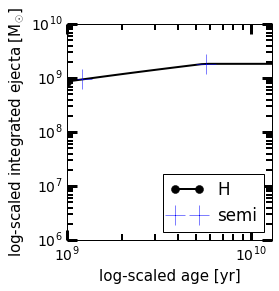

In [57]:
plt.figure(11)
s1_chabrier.plot_mass(fig=11,specie='H',label='H',color='k',shape='-',marker='o',markevery=800)
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6]
def yields(m,k_N):
    return ( k_N/1.3 * 0.0443*(m**-1.3 - 30.**-1.3) ) * 0.1
yields1=[]
for m1 in m:
    yields1.append(yields(m1,k_N))
plt.plot(ages,yields1,marker='+',linestyle='',markersize=20,label='semi')
plt.legend(loc=4)



Simulation should agree with semi-analytical calculations for Chabrier IMF.

## 2. Supernova

The element production due to core-collapse supernova are included in the yields of massive stars.
Supernova Ia have their origin in white dwarfs and their nucleosynthesis products are treated seperately (via a extra yield table loaded with the sn1a_table variable).


$N_{Ia} = A_{Ia} * \int_t^{t+\Delta t} f_{WD}(t^{'})\Psi_{Ia}(t^{'})dt^{'} $

In [60]:
s1_snIa=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_on=True,sn1a_rate='maoz',
           imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt', 
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')

SYGMA run in progress..
   SYGMA run completed - Run time: 0.58s


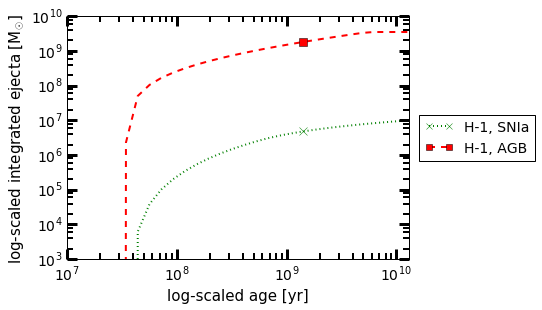

In [64]:
s1_snIa.plot_mass(fig=33,specie='H-1',source='sn1a') 
s1_snIa.plot_mass(fig=33,specie='H-1',source='agb') 

Access to SNIa reservoir only:

In [67]:
print s1_snIa.history.ism_elem_yield_1a[-1],s1_snIa.history.ism_elem_yield[-1]

[10000000.000000006] [3697728129.7192101]


## 3. Basic parameter 

### a) Total mass

In [78]:
s1_1e7=s.sygma(iolevel=0,mgal=1e7,dt=1e7,tend=1.3e10,hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=False, 
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
s1_1e9=s.sygma(iolevel=0,mgal=1e9,dt=1e9,tend=1.3e10,hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=False, 
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')

 SYGMA run in progress..
   SYGMA run completed - Run time: 0.33s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.28s


Final mass fraction should not depend on the total mass:

In [84]:
print sum(s1_1e7.history.ism_elem_yield[-1])/1e7,sum(s1_1e9.history.ism_elem_yield[-1])/1e9
print sum(s1_1e7.history.ism_iso_yield[-1])/1e7,sum(s1_1e9.history.ism_iso_yield[-1])/1e9

0.0170583657213 0.0170583657213
0.0170583657213 0.0170583657213


### b) Transition mass

The transition from AGB stars to massive stars, including the super-AGB stage are still not fully understood.

Here we test the difference between the choice of 8Msun and 10Msun.

In [87]:
s1_8=s.sygma(iolevel=0,imf_bdys=[1.65,30],transitionmass=8,mgal=1e11,dt=1e7,tend=1.3e10,hardsetZ=0.0001,
           table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=False, sn1a_table='yield_tables/sn1a_h1.txt', 
           iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
s1_10=s.sygma(iolevel=0,imf_bdys=[1.65,30],transitionmass=10,mgal=1e11,dt=1e7,tend=1.3e10,hardsetZ=0.0001,
           table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=False, sn1a_table='yield_tables/sn1a_h1.txt', 
           iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
Yield_tot_sim_8=s1_8.history.ism_iso_yield_agb[-1][0]
Yield_tot_sim_10=s1_10.history.ism_iso_yield_agb[-1][0]

SYGMA run in progress..
   SYGMA run completed - Run time: 0.29s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.28s


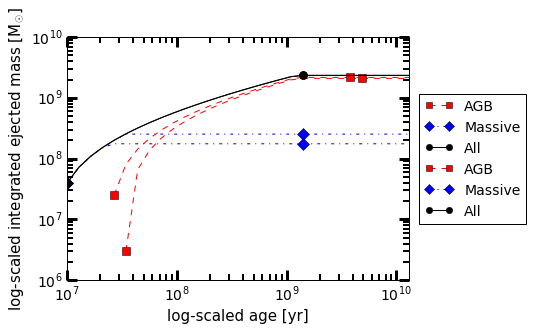

In [88]:
s1_8.plot_totmasses(source='agb')
s1_8.plot_totmasses(source='massive')
s1_8.plot_totmasses(source='all')
s1_10.plot_totmasses(source='agb')
s1_10.plot_totmasses(source='massive')
s1_10.plot_totmasses(source='all')

In [89]:
alphaimf=2.35
k_N=1e11*(alphaimf-2)/ (-1.65**-(alphaimf-2) + 30**-(alphaimf-2))

N_tot=k_N/(alphaimf-1) * (-1.65**-(alphaimf-1) + 8**-(alphaimf-1))
Yield_tot_8=0.1*N_tot
N_tot=k_N/(alphaimf-1) * (-1.65**-(alphaimf-1) + 10**-(alphaimf-1))
Yield_tot_10=0.1*N_tot

print '1:',Yield_tot_sim_8/Yield_tot_8
print '1:',Yield_tot_sim_10/Yield_tot_10


1: 0.965926274324
1: 0.967865323769


### c) Time resolution

#### First constant timestep size of 1e7; then with special_timesteps 200 log steps.

In [91]:
s1_dt_const=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,special_timesteps=-1,imf_type='salpeter',
           imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=False, 
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn',
          stellar_param_on=False)
s1_dt_log=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,special_timesteps=200,imf_type='salpeter',
           imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=False, 
           sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')

SYGMA run in progress..
   SYGMA run completed - Run time: 13.62s
SYGMA run in progress..
   SYGMA run completed - Run time: 2.16s


In [74]:
print 'should be 1 ',s1_dt_const.history.ism_iso_yield[-1][0]/s1_dt_log.history.ism_iso_yield[-1][0]

should be 1  1.0


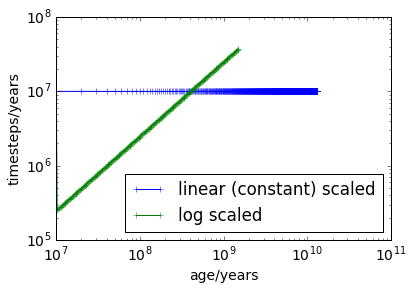

In [56]:
plt.figure(55)
plt.plot(s1.history.age[1:],s1.history.timesteps,label='linear (constant) scaled',marker='+')
plt.plot(s2.history.age[1:],s2.history.timesteps,label='log scaled',marker='+')
plt.yscale('log');plt.xscale('log')
plt.xlabel('age/years');plt.ylabel('timesteps/years');plt.legend(loc=4)

Test the total isotopic and elemental ISM matter at first and last timestep.

## 4. Neutron stars

Neutron stars are born from collapsing massive stars. Neutron stars (NS) in binary systems can produce heavy elements due to their highly neutron-rich matter. The the amount of neutron stars is set by different factors while the ejecta per neutron star is set via an input table (variable nsmerger_table).

To calculate the amount of neutron stars $N_{NS}$ in the interval $[t,t+\Delta t]$ one needs

$N_{NS} = A_{NS} \int_t^{t+\Delta t} \Psi_{NS}(t^{'},Z)dt^{'}$

To constrain the formula above the binary fraction of all massive stars, the fraction of merger of massive-star binary systems and the initial mass interval for potential merger need to be known.

In [125]:
s1_ns_merger=s.sygma(mgal=1e11,dt=1e7,iniZ=0.02,hardsetZ=0.02,special_timesteps=-1,
          ns_merger_on=True,f_binary=1.0, f_merger=0.0008, t_merger_max=1.0e10,
                     nsmerger_table = 'yield_tables/r_process_rosswog_2014.txt')
s1_default=s.sygma(mgal=1e11,dt=1e7,iniZ=0.02,hardsetZ=0.02,special_timesteps=-1,ns_merger_on=False,bhns_merger_on=False)

SYGMA run in progress..
   SYGMA run completed - Run time: 27.88s
SYGMA run in progress..
   SYGMA run completed - Run time: 30.28s


The number of NS in time bins of 1e7yrs decrease over time.

(10000000.0, 13000000000.0)

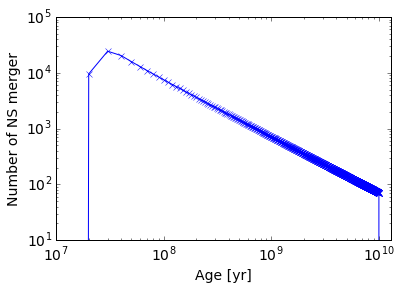

In [126]:
plt.plot(s1_ns_merger.history.age[1:],s1_ns_merger.nsm_numbers,marker='x')
plt.xscale('log');plt.yscale('log');
plt.ylabel('Number of NS merger'); plt.xlabel('Age [yr]')
plt.xlim(1e7,13e9)

(5000000.0, 13000000000.0)

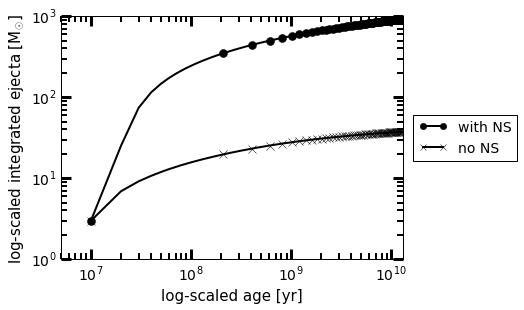

In [127]:
s1_ns_merger.plot_mass(specie='Au',label='with NS')
s1_default.plot_mass(specie='Au',label='no NS',marker='x')
plt.xlim(5e6,13e9)